In [15]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [17]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST(root='./digitals_data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST(root='./digitals_data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)

# Print the shape of the dataset
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(f"Batch of training images shape: {images.shape}")


Batch of training images shape: torch.Size([64, 1, 28, 28])


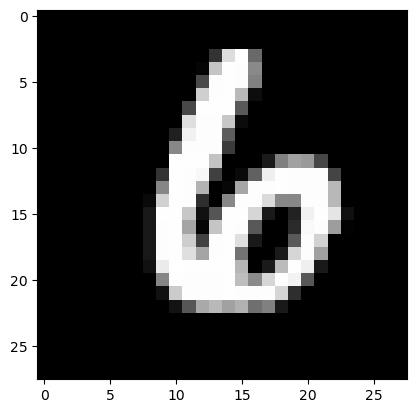

Label: 6


In [18]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Show one image
imshow(images[0])
print(f"Label: {labels[0].item()}")

In [19]:
torch.manual_seed(0)

class DigitalRecognition(nn.Module):
    def __init__(self):
        super().__init__()
        self.first_linear = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()
        self.projection = nn.Linear(512, 10)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, images):
        return self.sigmoid(self.projection(self.dropout(self.relu(self.first_linear(images)))))

In [7]:
# The below code is the same regardless of the neural network
model = DigitalRecognition()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

epochs = 5
for epoch in range(epochs):
    for images, labels in trainloader:
        images = images.view(images.shape[0], 784)

        # TRAINING BODY

        model_predictions = model(images)
        optimizer.zero_grad()
        loss = loss_function(model_predictions, labels)
        loss.backward()
        optimizer.step() # new_w = old_w - derivative * learning_curve

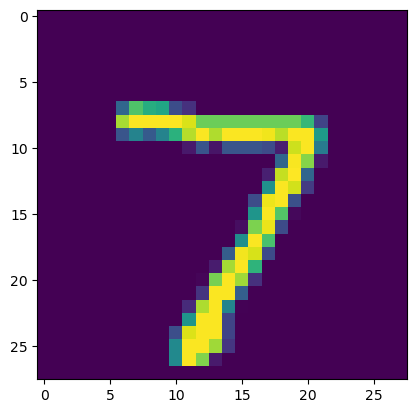

7


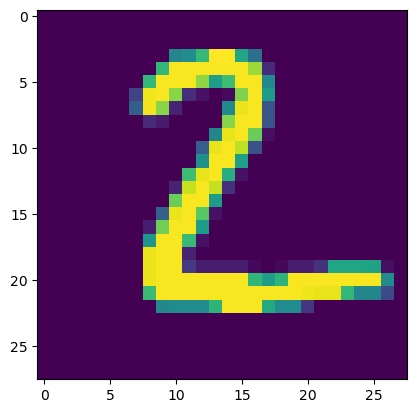

2


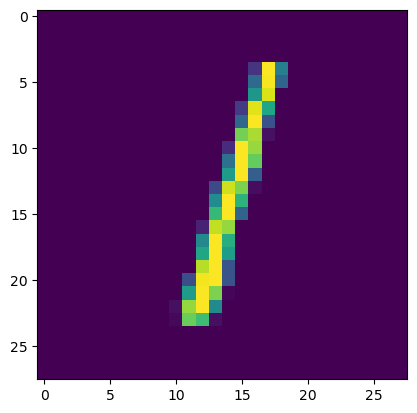

1


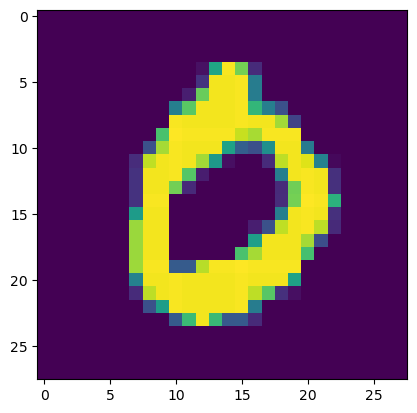

0


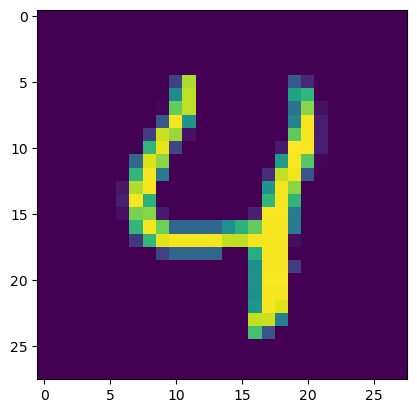

4


In [8]:
model.eval()
for images, labels in testloader:
    images = images.view(images.shape[0], 784)

    model_predictions = model(images)
    max, idx = torch.max(model_predictions, dim=1)
    for i in range(len(images)):
        plt.imshow(images[i].view(28,28))
        plt.show()
        print(idx[i].item())
    break